In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import math

In [2]:
df = pd.read_excel('F:/Context_Aware_Data_Cleaning_Deep/UBMEC/Dataset/ubmec_clean.xlsx')

In [3]:
df.head

<bound method NDFrame.head of                                                     text   classes
0      এই নাটকটি হচ্ছে এই সালের। কিন্তু তখন ইউটিউবে ছ...       joy
1       ২০২১ সালে যারা “ কোথাও কেউ নেই ” দেখতে আসে - ...  surprise
2       " বাংলাদেশের ইতিহাসে সর্বশ্রেষ্ঠ নাটক " " কোথ...       joy
3       এতো সুন্দর নাটক আগে কখনো দেখা হয় নাই,2021 সাল...       joy
4       কখনো চিন্তাও করিনি জন্মের ৭-৮ বছর আগের নাটক দ...  surprise
...                                                  ...       ...
13431   Bravo বললে ছোট করা হবে ৷ সুতরাং হাজারো সালাম ...       joy
13432   কি যে করেন না করা স্যার? মৃত্যুকে পরে ভাবছি ব...       joy
13433   আপনারা এই সত্যের পথে অবিচল থাকুন দেশবাসী আপনা...       joy
13434         এগিয়ে যান। আপনাদের দিকেই তাকিয়ে বাংলাদেশ।        joy
13435   দুর্নীতি মুক্ত হলে নিশ্চয় দুর্নীতি মুক্ত হবে ...       joy

[13436 rows x 2 columns]>

In [4]:
df.groupby("classes").describe()

text                                                               
         count unique                                                top freq
classes                                                                      
anger     2480   2433                                         বিচার চাই     5
disgust   2079   2042   এর পরে কোনো গাড়ি খেয়ে দিলেই সব সরকারের দোষ পর...    3
fear      1361   1349   এই দ্রবনে করোনার ভাইরাস মরে কিনা সেটা জানার জ...    2
joy       3467   3287                                           ধন্যবাদ    28
sadness   2683   2625   অপরাধ অপরাধ এবং অপরাধী কে কারী এবং দুজনেই সমা...   12
surprise  1366   1341   কিছুক্ষণ আগে লক্ষ্য করলাম কিছু মানুষ বাঙলাদেশ...    4

In [5]:
df['text'] = df['text'].astype(str)

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import LabelBinarizer

In [7]:
count_vect = CountVectorizer() # for converting text into count-based vectors
tfidf_transformer = TfidfTransformer() # for converting text into tf-idf-based vectors
lb = LabelBinarizer() # object for making class-labels into binary numbers

In [8]:
df.columns

Index(['text', 'classes'], dtype='object')

In [9]:
df.head

<bound method NDFrame.head of                                                     text   classes
0      এই নাটকটি হচ্ছে এই সালের। কিন্তু তখন ইউটিউবে ছ...       joy
1       ২০২১ সালে যারা “ কোথাও কেউ নেই ” দেখতে আসে - ...  surprise
2       " বাংলাদেশের ইতিহাসে সর্বশ্রেষ্ঠ নাটক " " কোথ...       joy
3       এতো সুন্দর নাটক আগে কখনো দেখা হয় নাই,2021 সাল...       joy
4       কখনো চিন্তাও করিনি জন্মের ৭-৮ বছর আগের নাটক দ...  surprise
...                                                  ...       ...
13431   Bravo বললে ছোট করা হবে ৷ সুতরাং হাজারো সালাম ...       joy
13432   কি যে করেন না করা স্যার? মৃত্যুকে পরে ভাবছি ব...       joy
13433   আপনারা এই সত্যের পথে অবিচল থাকুন দেশবাসী আপনা...       joy
13434         এগিয়ে যান। আপনাদের দিকেই তাকিয়ে বাংলাদেশ।        joy
13435   দুর্নীতি মুক্ত হলে নিশ্চয় দুর্নীতি মুক্ত হবে ...       joy

[13436 rows x 2 columns]>

In [10]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df["classes_bin"] = lb_make.fit_transform(df["classes"])
df[["classes_bin", "classes"]].head(11)

,classes_bin,classes
0,3,joy
1,5,surprise
2,3,joy
3,3,joy
4,5,surprise
5,3,joy
6,3,joy
7,4,sadness
8,3,joy
9,3,joy


In [11]:
df

,text,classes,classes_bin
0,এই নাটকটি হচ্ছে এই সালের। কিন্তু তখন ইউটিউবে ছ...,joy,3
1,২০২১ সালে যারা “ কোথাও কেউ নেই ” দেখতে আসে - ...,surprise,5
2,""" বাংলাদেশের ইতিহাসে সর্বশ্রেষ্ঠ নাটক "" "" কোথ...",joy,3
3,"এতো সুন্দর নাটক আগে কখনো দেখা হয় নাই,2021 সাল...",joy,3
4,কখনো চিন্তাও করিনি জন্মের ৭-৮ বছর আগের নাটক দ...,surprise,5
...,...,...,...
13431,Bravo বললে ছোট করা হবে ৷ সুতরাং হাজারো সালাম ...,joy,3
13432,কি যে করেন না করা স্যার? মৃত্যুকে পরে ভাবছি ব...,joy,3
13433,আপনারা এই সত্যের পথে অবিচল থাকুন দেশবাসী আপনা...,joy,3
13434,এগিয়ে যান। আপনাদের দিকেই তাকিয়ে বাংলাদেশ।,joy,3


In [12]:
df.isnull()

,text,classes,classes_bin
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
13431,False,False,False
13432,False,False,False
13433,False,False,False
13434,False,False,False


In [13]:
df.dropna(inplace=True)

In [14]:
df

,text,classes,classes_bin
0,এই নাটকটি হচ্ছে এই সালের। কিন্তু তখন ইউটিউবে ছ...,joy,3
1,২০২১ সালে যারা “ কোথাও কেউ নেই ” দেখতে আসে - ...,surprise,5
2,""" বাংলাদেশের ইতিহাসে সর্বশ্রেষ্ঠ নাটক "" "" কোথ...",joy,3
3,"এতো সুন্দর নাটক আগে কখনো দেখা হয় নাই,2021 সাল...",joy,3
4,কখনো চিন্তাও করিনি জন্মের ৭-৮ বছর আগের নাটক দ...,surprise,5
...,...,...,...
13431,Bravo বললে ছোট করা হবে ৷ সুতরাং হাজারো সালাম ...,joy,3
13432,কি যে করেন না করা স্যার? মৃত্যুকে পরে ভাবছি ব...,joy,3
13433,আপনারা এই সত্যের পথে অবিচল থাকুন দেশবাসী আপনা...,joy,3
13434,এগিয়ে যান। আপনাদের দিকেই তাকিয়ে বাংলাদেশ।,joy,3


In [16]:
text = df['text'].values.tolist()

In [17]:
df.groupby("classes").describe()

classes_bin                                   
               count mean  std  min  25%  50%  75%  max
classes                                                
anger         2480.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
disgust       2079.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
fear          1361.0  2.0  0.0  2.0  2.0  2.0  2.0  2.0
joy           3467.0  3.0  0.0  3.0  3.0  3.0  3.0  3.0
sadness       2683.0  4.0  0.0  4.0  4.0  4.0  4.0  4.0
surprise      1366.0  5.0  0.0  5.0  5.0  5.0  5.0  5.0

In [18]:
df["classes"].value_counts()

joy         3467
sadness     2683
anger       2480
disgust     2079
surprise    1366
fear        1361
Name: classes, dtype: int64

In [19]:
longest_string = max(df["text"], key=len)
print(len(longest_string))

3612


In [20]:
text = df["text"]

In [21]:
train_counts = count_vect.fit_transform(text) # converting docs into vectors
train_tfidf  = train_counts 
train_tfidf = tfidf_transformer.fit_transform(train_counts) # converting transformed vectors into tf-idf vectors
train_tfidf.shape

(13436, 4813)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(train_tfidf, df['classes_bin'], test_size=0.2, random_state=42)

Y_pre = df['classes']
target_names = list(set(Y_pre))

In [24]:
target_names

['sadness', 'surprise', 'disgust', 'anger', 'joy', 'fear']

In [25]:
X_train

<10748x4813 sparse matrix of type '<class 'numpy.float64'>'
	with 102799 stored elements in Compressed Sparse Row format>

In [26]:
y_train

1501     3
11407    5
2777     4
10943    0
8387     2
        ..
5191     2
13418    3
5390     4
860      2
7270     4
Name: classes_bin, Length: 10748, dtype: int32

In [27]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import RandomizedSearchCV 

In [28]:
import seaborn as sn

# Naive Bayes

In [29]:
from sklearn.naive_bayes import MultinomialNB

Test set accuracy 0.3861607142857143
              precision    recall  f1-score   support

     sadness       0.41      0.30      0.35       491
    surprise       0.32      0.05      0.09       416
     disgust       0.81      0.21      0.33       275
       anger       0.38      0.84      0.52       674
         joy       0.34      0.44      0.38       541
        fear       0.86      0.04      0.08       291

    accuracy                           0.39      2688
   macro avg       0.52      0.31      0.29      2688
weighted avg       0.46      0.39      0.33      2688



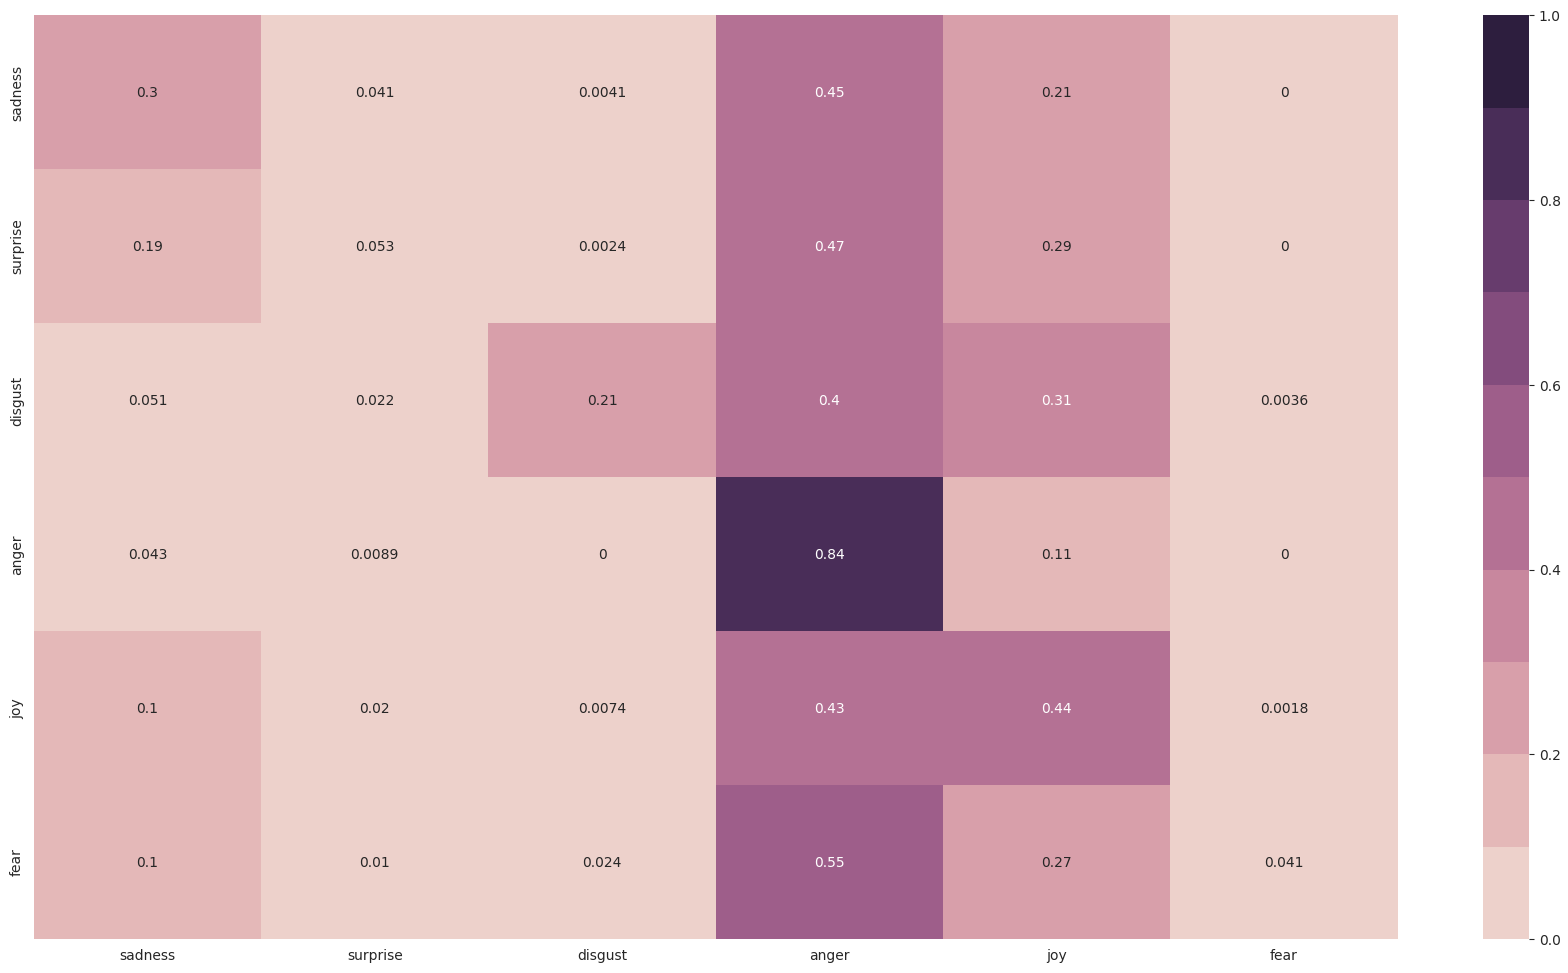

In [30]:
NBclassifer = MultinomialNB()
NBclassifer.fit(X_train, y_train)
y_pred = NBclassifer.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)


# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1,  cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()
  

In [31]:
NBclassifer.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True, 'force_alpha': 'warn'}

# Support Vector Machine

In [32]:
from sklearn.svm import SVC


Test set accuracy 0.44233630952380953
              precision    recall  f1-score   support

     sadness       0.36      0.43      0.39       491
    surprise       0.31      0.22      0.26       416
     disgust       0.75      0.42      0.54       275
       anger       0.53      0.70      0.60       674
         joy       0.36      0.44      0.40       541
        fear       0.63      0.20      0.30       291

    accuracy                           0.44      2688
   macro avg       0.49      0.40      0.42      2688
weighted avg       0.46      0.44      0.43      2688



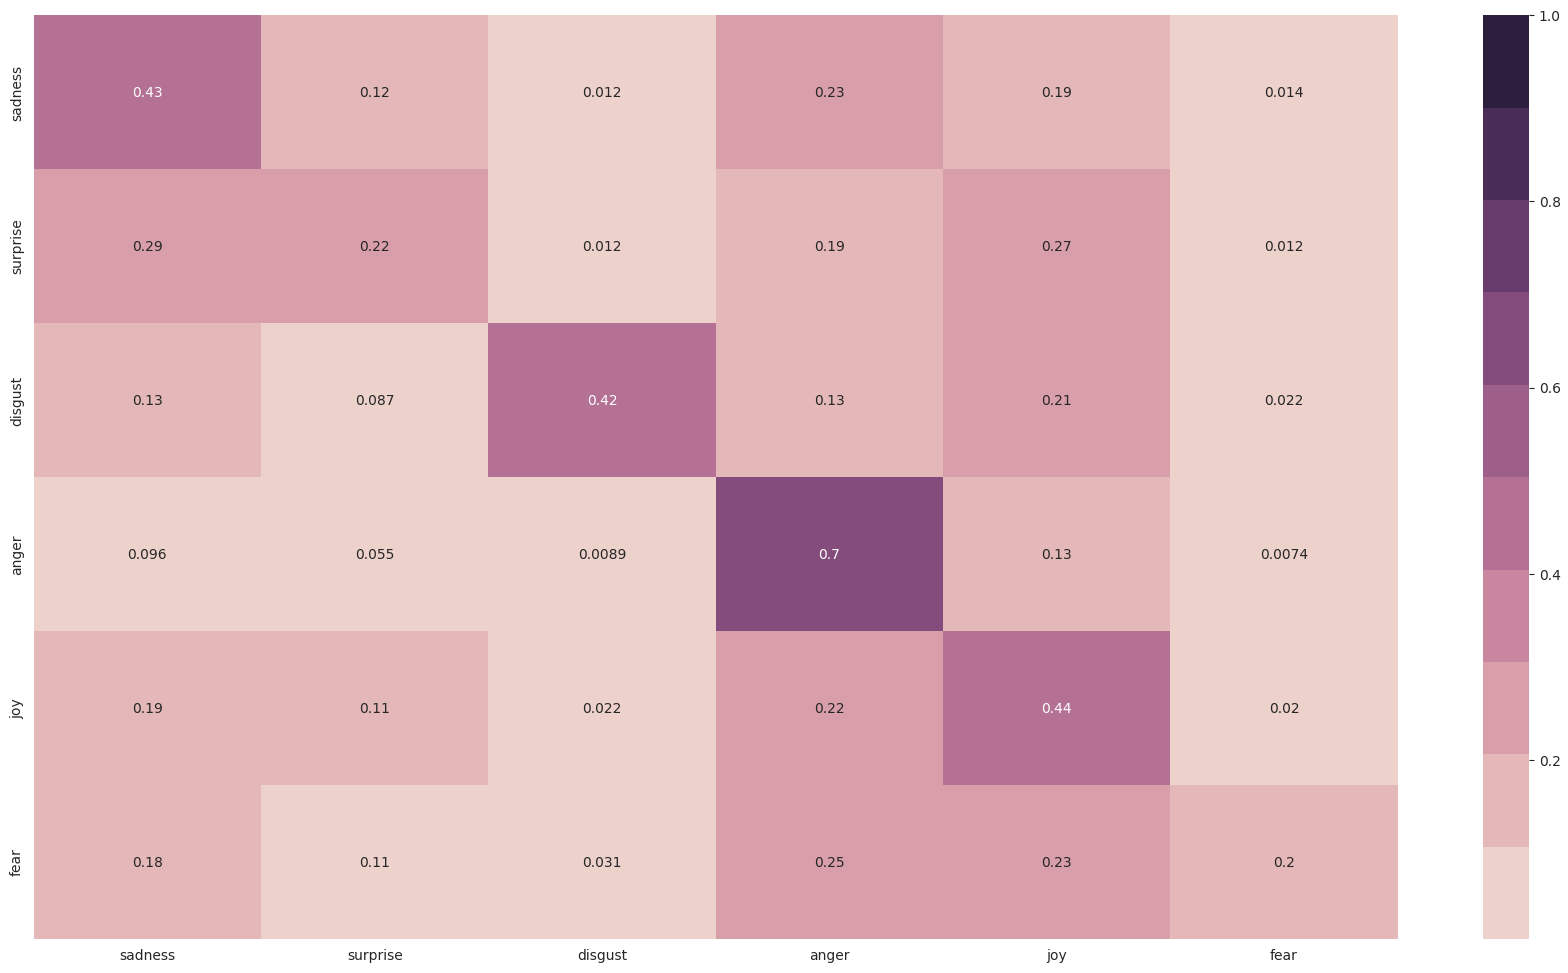

In [33]:
SVMclassifer = SVC()
SVMclassifer.fit(X_train, y_train)
y_pred = SVMclassifer.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1,  cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()

# XGBoost

In [34]:
from xgboost import XGBClassifier

Test set accuracy 0.421875
              precision    recall  f1-score   support

     sadness       0.32      0.37      0.35       491
    surprise       0.31      0.19      0.23       416
     disgust       0.64      0.45      0.53       275
       anger       0.48      0.71      0.57       674
         joy       0.36      0.36      0.36       541
        fear       0.55      0.25      0.34       291

    accuracy                           0.42      2688
   macro avg       0.44      0.39      0.40      2688
weighted avg       0.43      0.42      0.41      2688



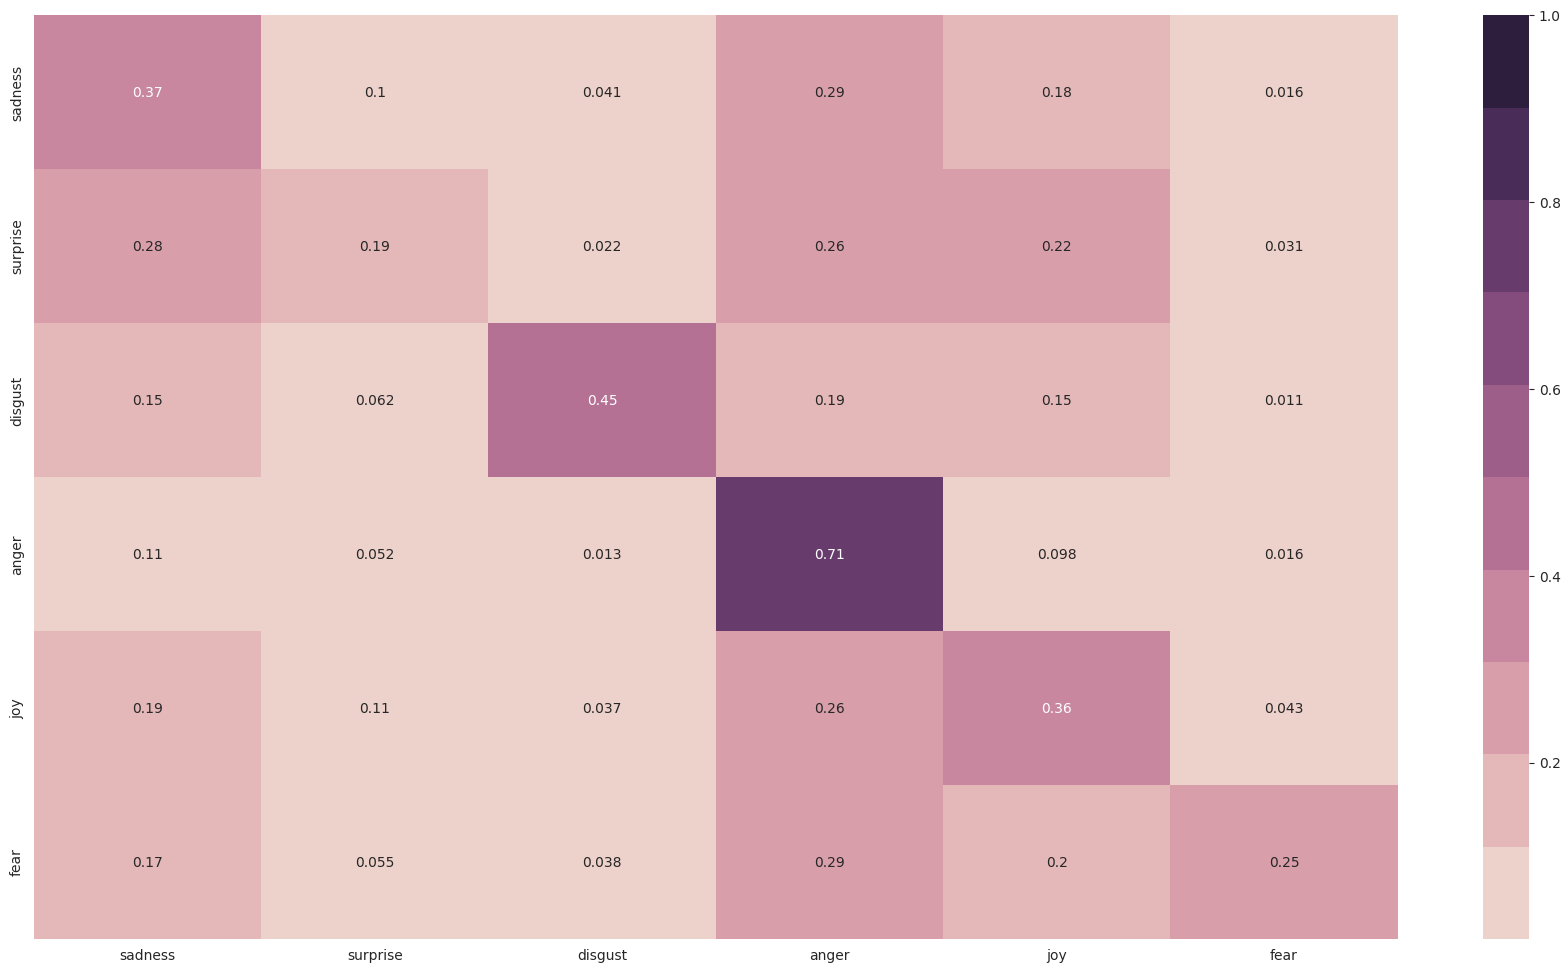

In [35]:
XGBclassifer = XGBClassifier()
XGBclassifer.fit(X_train, y_train)
y_pred = XGBclassifer.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1,  cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()


# Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

Test set accuracy 0.41964285714285715
              precision    recall  f1-score   support

     sadness       0.33      0.39      0.36       491
    surprise       0.29      0.15      0.20       416
     disgust       0.69      0.45      0.54       275
       anger       0.46      0.70      0.56       674
         joy       0.37      0.39      0.38       541
        fear       0.56      0.22      0.31       291

    accuracy                           0.42      2688
   macro avg       0.45      0.38      0.39      2688
weighted avg       0.43      0.42      0.40      2688



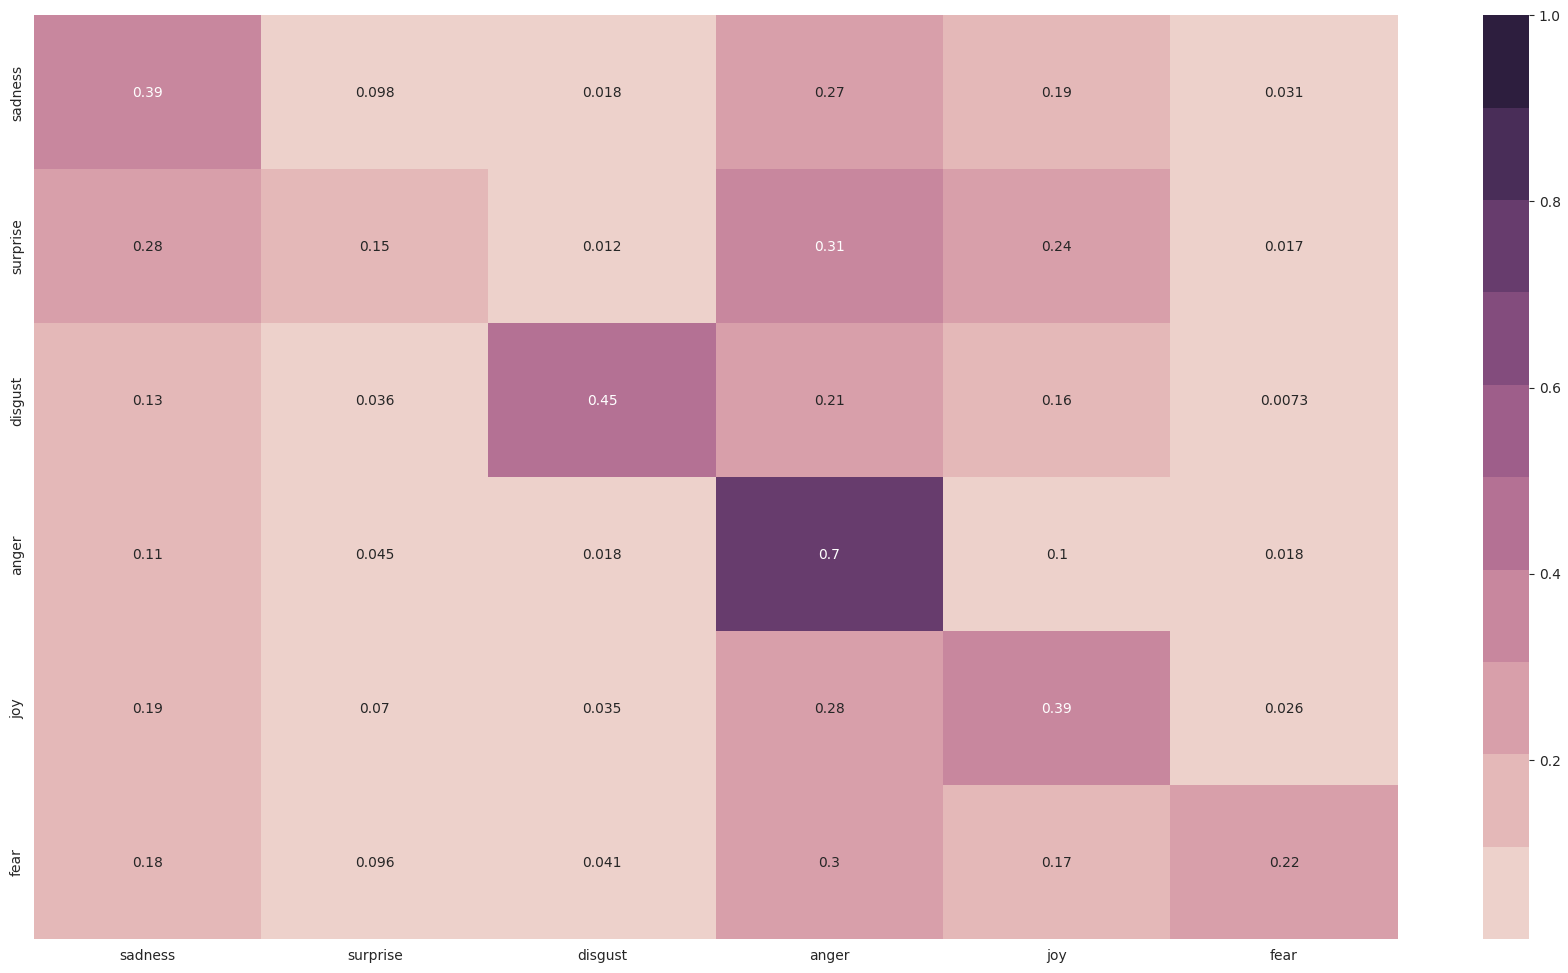

In [37]:
RFclassifer = RandomForestClassifier()
shapas = RFclassifer.fit(X_train, y_train)
y_pred = RFclassifer.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1,  cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()
  